In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import keras

Using TensorFlow backend.


In [2]:
#Import Keras module
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, advanced_activations
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
#pretty plots
%matplotlib inline

#Load the index data
raw_data = pd.read_csv('price_only.csv', skiprows=1, parse_dates=['Date']).set_index(['Date'])
raw_data.tail()

,P,P_L1,P_L2,P_L3,P_L4,P_L5,P_L6,P_L7,P_L8,P_L9,...,P_L11,P_L12,P_L13,P_L14,P_L15,P_L16,P_L17,P_L18,P_L19,P_L20
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-04,28.60,28.75,28.75,28.85,28.50,28.65,28.55,28.20,28.15,27.90,...,28.05,28.10,27.85,27.90,27.65,28.15,28.45,28.55,28.35,28.25
2017-09-05,28.60,28.60,28.75,28.75,28.85,28.50,28.65,28.55,28.20,28.15,...,27.75,28.05,28.10,27.85,27.90,27.65,28.15,28.45,28.55,28.35
2017-09-06,28.45,28.60,28.60,28.75,28.75,28.85,28.50,28.65,28.55,28.20,...,27.90,27.75,28.05,28.10,27.85,27.90,27.65,28.15,28.45,28.55
2017-09-07,28.40,28.45,28.60,28.60,28.75,28.75,28.85,28.50,28.65,28.55,...,28.15,27.90,27.75,28.05,28.10,27.85,27.90,27.65,28.15,28.45
2017-09-08,28.55,28.40,28.45,28.60,28.60,28.75,28.75,28.85,28.50,28.65,...,28.20,28.15,27.90,27.75,28.05,28.10,27.85,27.90,27.65,28.15


In [4]:
raw_data.tail()

,P,P_L1,P_L2,P_L3,P_L4,P_L5,P_L6,P_L7,P_L8,P_L9,...,P_L11,P_L12,P_L13,P_L14,P_L15,P_L16,P_L17,P_L18,P_L19,P_L20
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-04,28.60,28.75,28.75,28.85,28.50,28.65,28.55,28.20,28.15,27.90,...,28.05,28.10,27.85,27.90,27.65,28.15,28.45,28.55,28.35,28.25
2017-09-05,28.60,28.60,28.75,28.75,28.85,28.50,28.65,28.55,28.20,28.15,...,27.75,28.05,28.10,27.85,27.90,27.65,28.15,28.45,28.55,28.35
2017-09-06,28.45,28.60,28.60,28.75,28.75,28.85,28.50,28.65,28.55,28.20,...,27.90,27.75,28.05,28.10,27.85,27.90,27.65,28.15,28.45,28.55
2017-09-07,28.40,28.45,28.60,28.60,28.75,28.75,28.85,28.50,28.65,28.55,...,28.15,27.90,27.75,28.05,28.10,27.85,27.90,27.65,28.15,28.45
2017-09-08,28.55,28.40,28.45,28.60,28.60,28.75,28.75,28.85,28.50,28.65,...,28.20,28.15,27.90,27.75,28.05,28.10,27.85,27.90,27.65,28.15


In [5]:
#Import Fundamentals Data
fund_data = pd.read_csv('new_index_data.csv', skiprows=1, parse_dates=['Date']).set_index(['Date'])
fund_data.tail()

,Close,High,Low,Ask,Bid,20D Vol,MA5,MA15,MA12,MA20,...,DY_LTM,DY_NTM,ADV_VOL,PAYOUT,ANALYST_SENTIMENT,EPS_GRW_FY1,EPS_GRW_FY2,PE_NTM,PE_LTM,C2D_LTM
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-04,28.60,28.75,28.45,28.65,28.65,0.819246,28.69,28.391666,28.303333,28.2850,...,3.544426,3.507514,7.177266,41.956741,3.695006,14.166063,8.969697,11.948987,12.715609,70.064635
2017-09-05,28.60,28.70,28.55,28.60,28.60,0.816428,28.71,28.437500,28.350000,28.2975,...,3.542309,3.503232,67.776020,41.997881,3.552003,14.174380,8.964195,11.975427,12.735881,70.082040
2017-09-06,28.45,28.55,28.25,28.50,28.50,0.810433,28.63,28.495832,28.390000,28.2925,...,3.560407,3.526282,11.388969,41.930311,3.730903,14.556922,8.925029,11.878037,12.665071,70.087851
2017-09-07,28.40,28.70,28.30,28.40,28.40,0.807585,28.56,28.537500,28.410000,28.2900,...,3.571538,3.540298,49.430148,41.861716,4.011323,14.557857,9.011190,11.811609,12.622710,70.115768
2017-09-08,28.55,28.55,28.40,28.55,28.55,0.776205,28.52,28.570833,28.443333,28.3100,...,3.564015,3.531609,76.071715,41.880047,4.017320,14.633781,9.002825,11.846274,12.648720,70.108238


In [6]:
#Merge 2 data source
raw_data = pd.concat([fund_data, raw_data], axis=1)

In [7]:
#Generate future price
raw_data['PRED'] = raw_data['P'].shift(-1)

In [8]:
#Split into training set and test set
train_size = 0.8 #Again parameter to tune
val_size = (1 - train_size) * 0.5
timestep = 30

#Generate labels and data
X = raw_data.iloc[:-1,:-1]
y = raw_data.iloc[:-1,-1]

In [9]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(-1,1))
scalerX = scalerX.fit(X)
X = pd.DataFrame(scalerX.transform(X))

scalerY = MinMaxScaler(feature_range=(-1,1))
scalerY = scalerY.fit(y)
y = scalerY.transform(y)

C:\Users\bchik\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\bchik\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [10]:
#Calculate cutoff index values
train_cut_index = int(train_size * X.shape[0] - train_size * X.shape[0] % timestep)
val_cut_index = int(train_cut_index + int(val_size * X.shape[0] - val_size * X.shape[0] % timestep))
last_test_index = int(X.shape[0] - X.shape[0] % timestep)
print(train_cut_index)
print(val_cut_index)
print(last_test_index)

1950
2190
2460


In [11]:
#Spit Training, Validation and Test
X_train = np.array(X.iloc[0:train_cut_index,:])
X_val = np.array(X.iloc[train_cut_index:val_cut_index,:])
X_test = np.array(X.iloc[val_cut_index:last_test_index,:])

y_train = y[0:(train_cut_index)]
y_val = y[train_cut_index:val_cut_index]
y_test = y[val_cut_index:last_test_index]

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

#Preproc the y_train and y_test using to_categorical function
#y_train = to_categorical(y_train, num_classes=3)
#y_val = to_categorical(y_val, num_classes=3)
#y_test = to_categorical(y_test, num_classes=3)

(1950, 51)
(240, 51)
(270, 51)
(1950,)
(240,)
(270,)


In [24]:
#Preproc X_train, X_val, X_test for classification
cutoff = 0.005
X_train.shape

(65, 30, 51)

In [ ]:
#Preproc the y_train and y_test using to_categorical function
y_train_class = to_categorical(y_train, num_classes=3)
y_val_class = to_categorical(y_val, num_classes=3)
y_test_class = to_categorical(y_test, num_classes=3)

In [12]:
#Reshape data for inputting into LSTM

X_train = np.reshape(X_train, (int(X_train.shape[0]/timestep), timestep, X_train.shape[1]))
X_val = np.reshape(X_val, (int(X_val.shape[0]/timestep), timestep, X_val.shape[1]))
X_test = np.reshape(X_test, (int(X_test.shape[0]/timestep), timestep, X_test.shape[1]))

y_train = np.reshape(y_train, (int(y_train.shape[0]/timestep), timestep, 1))
y_val = np.reshape(y_val, (int(y_val.shape[0]/timestep), timestep, 1))
y_test = np.reshape(y_test, (int(y_test.shape[0]/timestep), timestep, 1))

In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
earlyStop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto', min_delta=0.0001)

In [14]:
from keras.layers import LSTM
model = Sequential()

model.add(Dense(20, input_shape=X_train.shape[1:], activation='relu'))
model.add(LSTM(20, return_sequences=True))
model.add(LSTM(10, return_sequences=True))
model.add(LSTM(5, return_sequences=True))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=1, verbose=1, callbacks=[earlyStop])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30, 20)            1040      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 20)            3280      
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 10)            1240      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 5)             320       
_________________________________________________________________
dense_2 (Dense)              (None, 30, 5)             30        
_________________________________________________________________
dense_3 (Dense)              (None, 30, 1)             6         
Total params: 5,916
Trainable params: 5,916
Non-trainable params: 0
_________________________________________________________________
Train on

In [15]:
pred = model.predict(X_test)
pred = scalerY.inverse_transform(pred.flatten())


C:\Users\bchik\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [16]:
true = scalerY.inverse_transform(y_test.flatten())


C:\Users\bchik\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


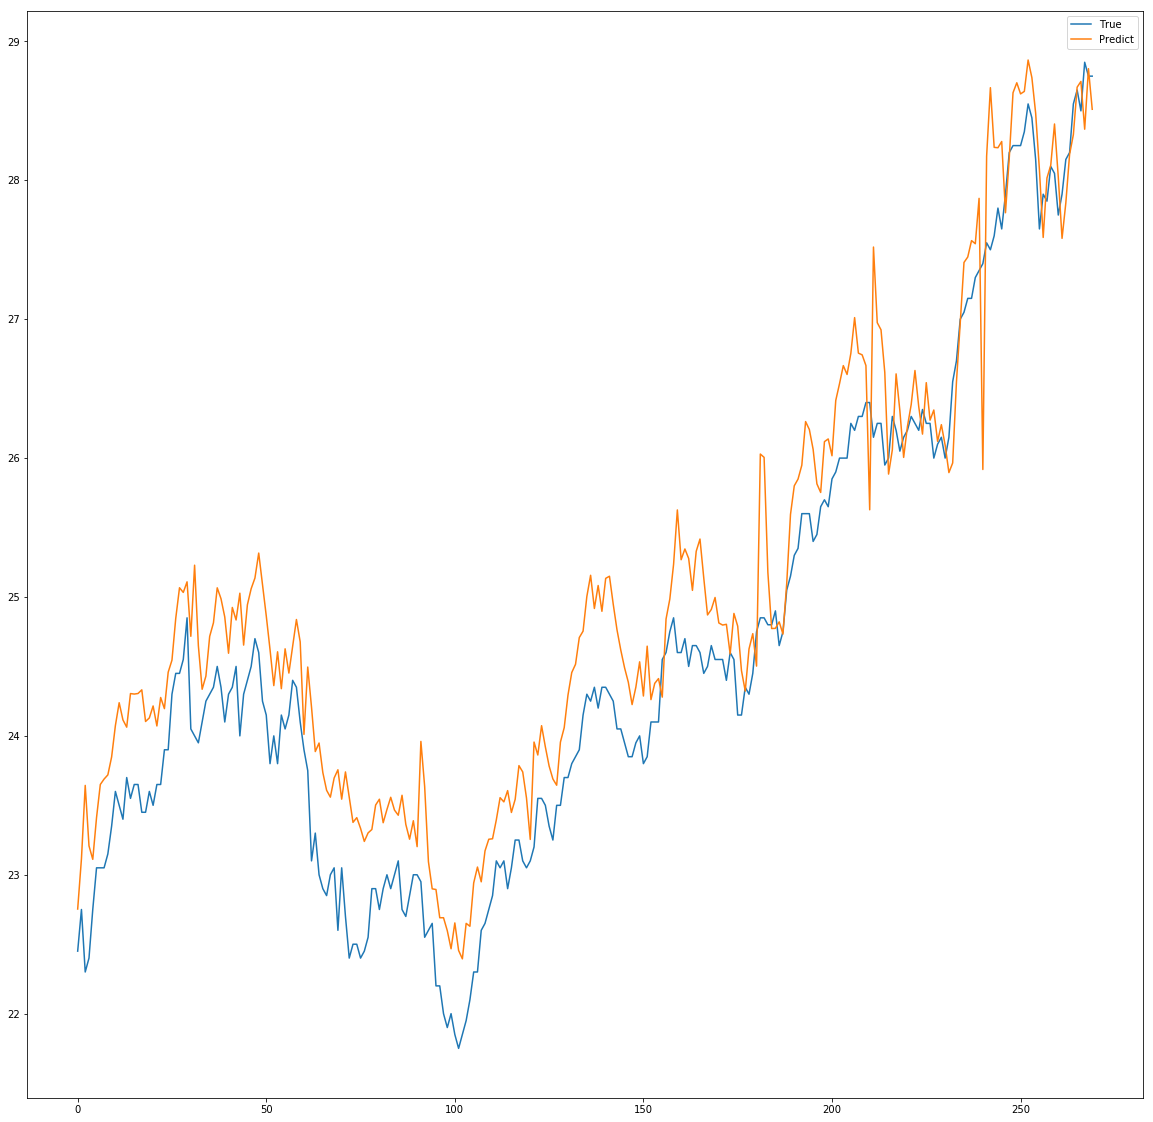

In [17]:
plt.figure(figsize=(20,20));
plt.plot(true);
plt.plot(pred);
plt.legend(['True', 'Predict']);
plt.show()

In [18]:
d = {'true': np.squeeze(true), 'pred': np.squeeze(pred)}
data = pd.DataFrame(d, index=range(0,len(true)))

In [19]:
diff = data - data.shift(-1)
pred_dir = diff['pred'] > 0
true_dir = diff['true'] > 0

In [20]:
np.sum(pred_dir == true_dir) /len(pred_dir)

0.52592592592592591

In [21]:
bm = np.zeros(len(pred_dir))

In [22]:
np.sum(bm == true_dir)/len(pred_dir)

0.67037037037037039